In [1]:
import os


files = os.listdir('../videos')
files = [f for f in files if f.endswith('.csv')]
files

['2024-04-23.csv',
 '2024-04-22.csv',
 '2024-04-20.csv',
 '2024-04-21.csv',
 '2024-06-08.csv',
 '2024-04-19.csv',
 '2024-04-25.csv',
 '2024-04-24.csv',
 '2024-04-30.csv',
 '2024-04-18.csv',
 '2024-06-09.csv',
 '2024-04-26.csv',
 'all_videos.csv',
 '2024-04-27.csv',
 '2024-05-28.csv',
 '2024-05-14.csv',
 '2024-07-11.csv',
 '2024-07-05.csv',
 '2024-07-04.csv',
 '2024-07-10.csv',
 '2024-05-01.csv',
 '2024-05-15.csv',
 '2024-05-29.csv',
 '2024-05-03.csv',
 '2024-05-17.csv',
 '2024-07-06.csv',
 '2024-07-12.csv',
 '2024-07-13.csv',
 '2024-07-07.csv',
 '2024-05-16.csv',
 '2024-05-02.csv',
 '2024-05-06.csv',
 '2024-05-12.csv',
 '2024-07-03.csv',
 '2024-05-13.csv',
 '2024-05-07.csv',
 '2024-05-11.csv',
 '2024-05-05.csv',
 '2024-07-14.csv',
 '2024-05-04.csv',
 '2024-05-10.csv',
 '2024-05-09.csv',
 '2024-05-21.csv',
 '2024-05-20.csv',
 '2024-05-08.csv',
 '2024-05-22.csv',
 '2024-05-23.csv',
 '2024-05-27.csv',
 '2024-05-26.csv',
 '2024-05-30.csv',
 '2024-05-24.csv',
 '2024-05-18.csv',
 '2024-07-09

In [2]:
# Combine all the csv files into one
import pandas as pd
HISTORY = True
if HISTORY:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    files_history = os.listdir('../videos/history')
    files_history = [f for f in files_history if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history/' + f) for f in files_history])
    files_history = os.listdir('../videos/history2')
    files_history = [f for f in files_history if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history2/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    df = df.drop_duplicates()
else:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    df = df.drop_duplicates()
df.to_csv('../videos/all_videos.csv', index=False)

In [3]:
# Load the combined csv file
df = pd.read_csv('../videos/all_videos.csv')

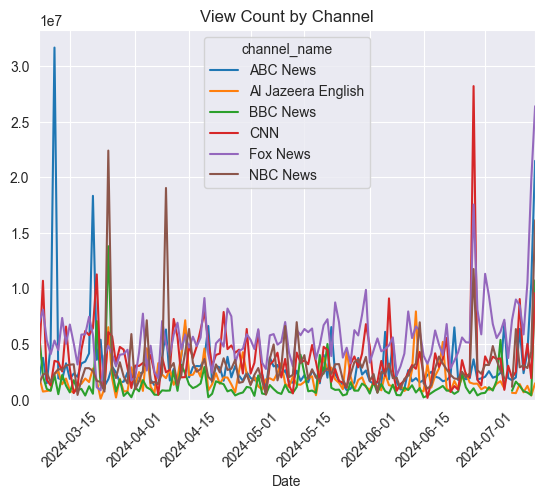

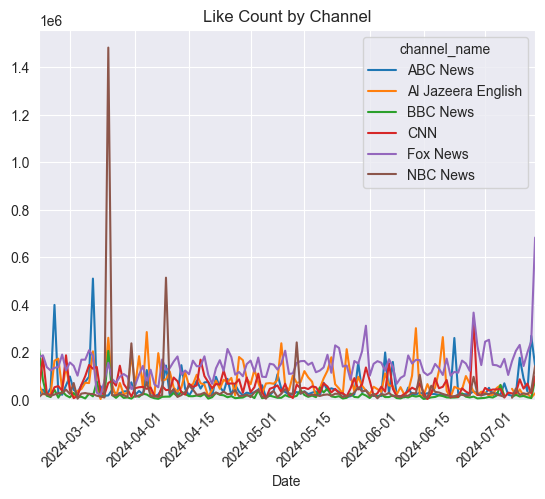

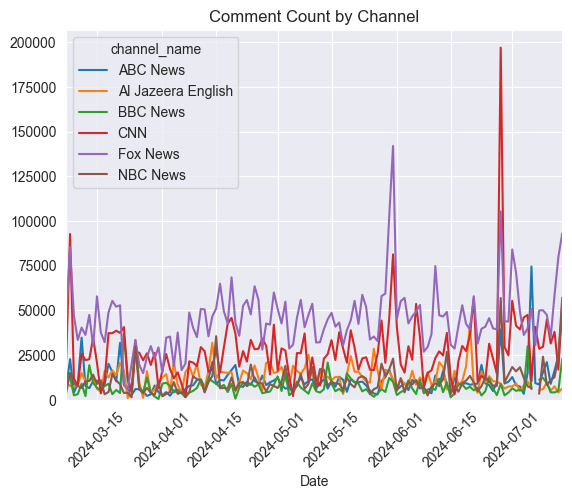

In [4]:
# Plot ViewCount and LikeCount for each channel by day
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['published_at']).dt.date
df['view_count'] = df['view_count'].fillna(0).astype(int)
df['like_count'] = df['like_count'].fillna(0).astype(int)
df['comment_count'] = df['comment_count'].fillna(0).astype(int)

df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().plot()
plt.title('View Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().plot()
plt.title('Like Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().plot()
plt.title('Comment Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

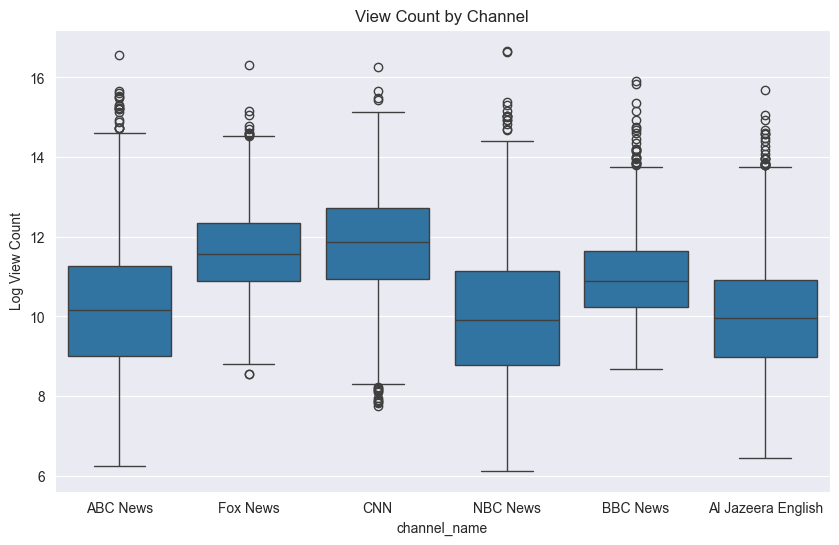

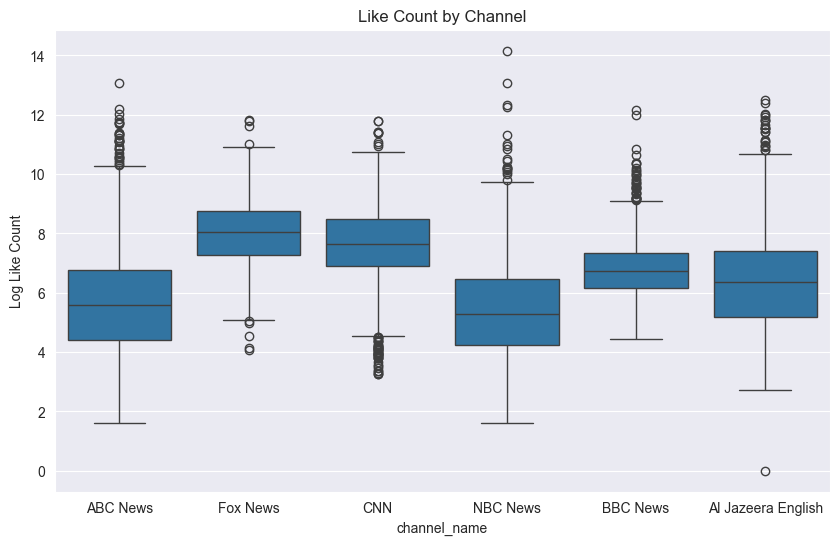

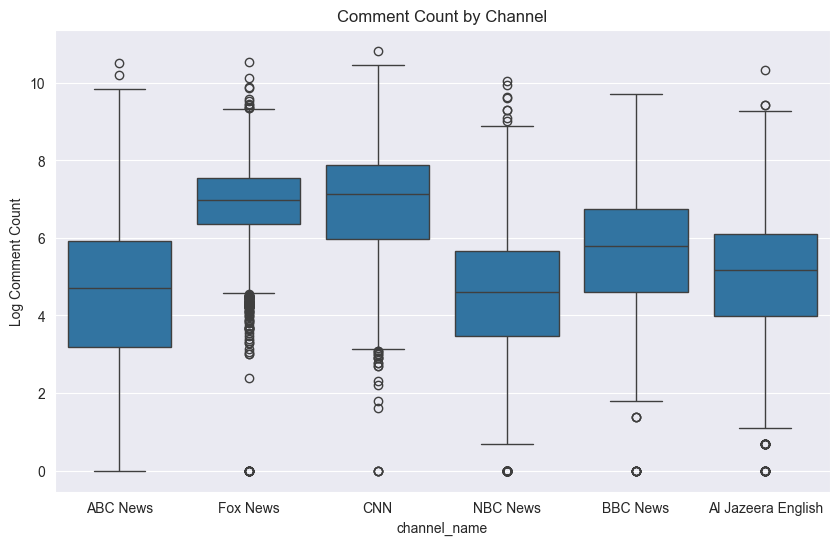

In [5]:
# box plot for view count, like count, and comment count
import seaborn as sns
import numpy as np

# use log scale for better visualization
df['view_count_log'] = df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['like_count_log'] = df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['comment_count_log'] = df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=df)
plt.title('View Count by Channel')
plt.ylabel('Log View Count')    
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=df)
plt.title('Like Count by Channel')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=df)
plt.title('Comment Count by Channel')
plt.ylabel('Log Comment Count')
plt.show()

In [6]:
political_words = ['trump', 'biden', 'democrat', 'republican']
political_df = df[df['video_title'].str.contains('|'.join(political_words), case=False)]

<Figure size 1000x600 with 0 Axes>

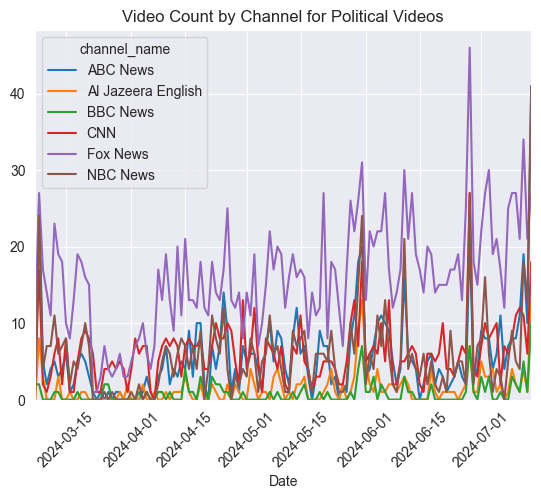

<Figure size 1000x600 with 0 Axes>

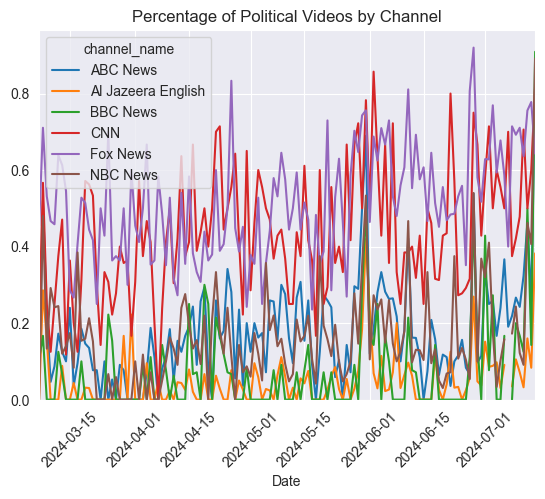

<Figure size 1000x600 with 0 Axes>

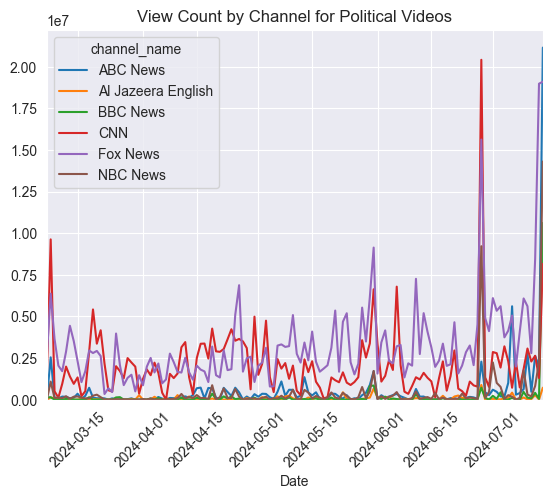

<Figure size 1000x600 with 0 Axes>

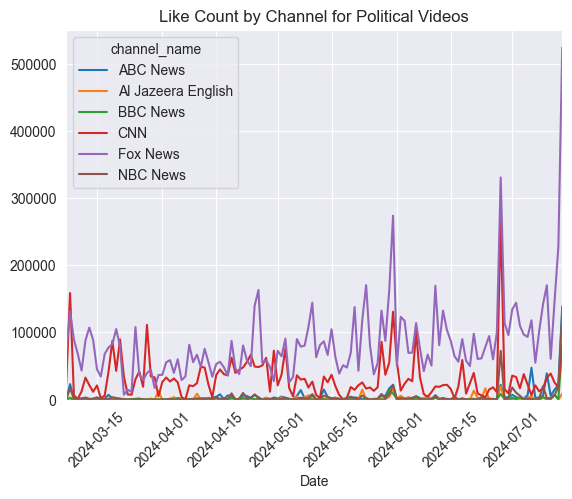

<Figure size 1000x600 with 0 Axes>

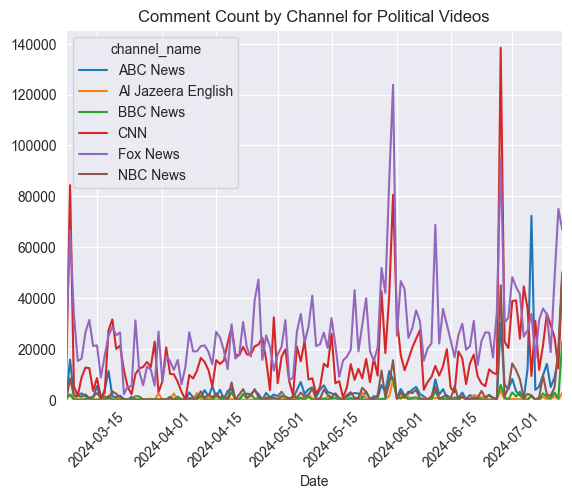

In [7]:
# video raw count
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).plot()
plt.title('Video Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# percentage of political videos to the total videos
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).div(df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0)).plot()
plt.title('Percentage of Political Videos by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0).plot()
plt.title('View Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/2306398103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['view_count_log'] = political_df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/2306398103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['like_count_log'] = political_df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T

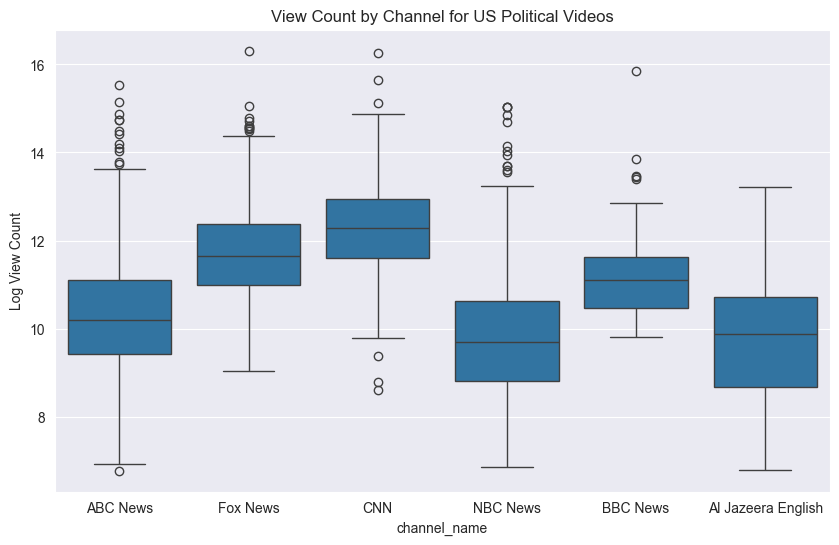

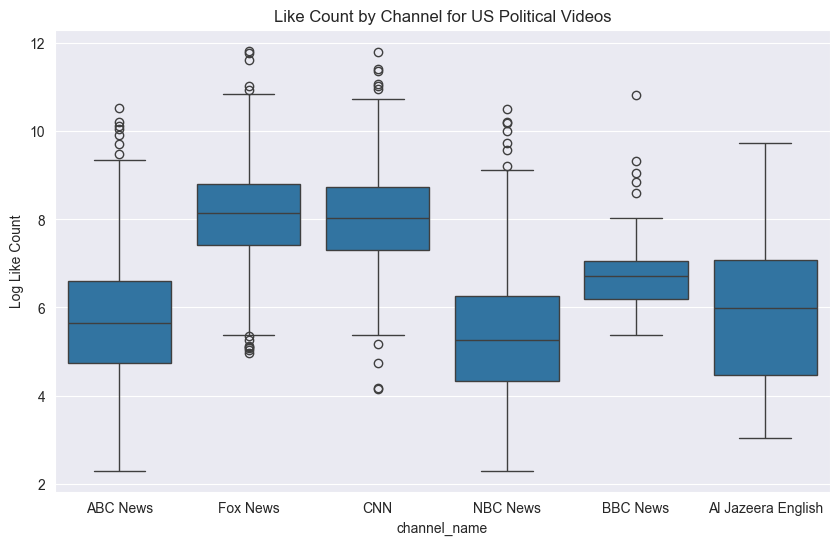

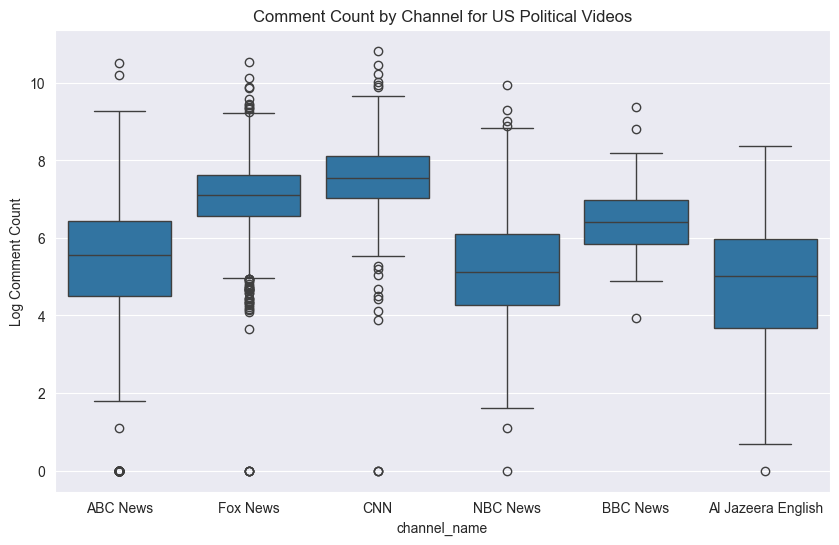

In [8]:
# box plot for view count, like count, and comment count
import seaborn as sns
import numpy as np

# use log scale for better visualization
political_df['view_count_log'] = political_df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
political_df['like_count_log'] = political_df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
political_df['comment_count_log'] = political_df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=political_df)
plt.title('View Count by Channel for US Political Videos')
plt.ylabel('Log View Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=political_df)
plt.title('Like Count by Channel for US Political Videos')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=political_df)
plt.title('Comment Count by Channel for US Political Videos')
plt.ylabel('Log Comment Count')
plt.show()

In [9]:
import matplotlib.pyplot as plt

# CNN and Fox News
cnn_fox = df[df['channel_name'].isin(['CNN', 'Fox News'])]
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,view_count_log,like_count_log,comment_count_log
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23,13.307803,9.292565,7.837160
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23,12.921649,9.849718,8.598589
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23,12.355496,8.714239,7.815611
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23,11.310540,7.875879,7.138073
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23,10.957085,7.240650,7.537963
...,...,...,...,...,...,...,...,...,...,...,...
18473,CNN,Biden speaks out about the shooting at Trump r...,2024-07-14T02:29:16Z,CLpfEw2Aw0k,315600,3553,3931,2024-07-14,12.662231,8.175548,8.276649
18474,CNN,Video captures shooting at Trump rally,2024-07-14T01:55:11Z,p3gUw6mr6-o,2856015,18108,11920,2024-07-14,14.864938,9.804109,9.385973
18475,CNN,Biden responds to Trump rally shooting,2024-07-14T00:50:20Z,e7fZL7itxus,180610,8147,2038,2024-07-14,12.104095,9.005405,7.619724
18476,CNN,Witness describes moment shooting occurred at ...,2024-07-14T00:35:46Z,Kc-l52InWAo,420846,4500,4443,2024-07-14,12.950022,8.411833,8.399085


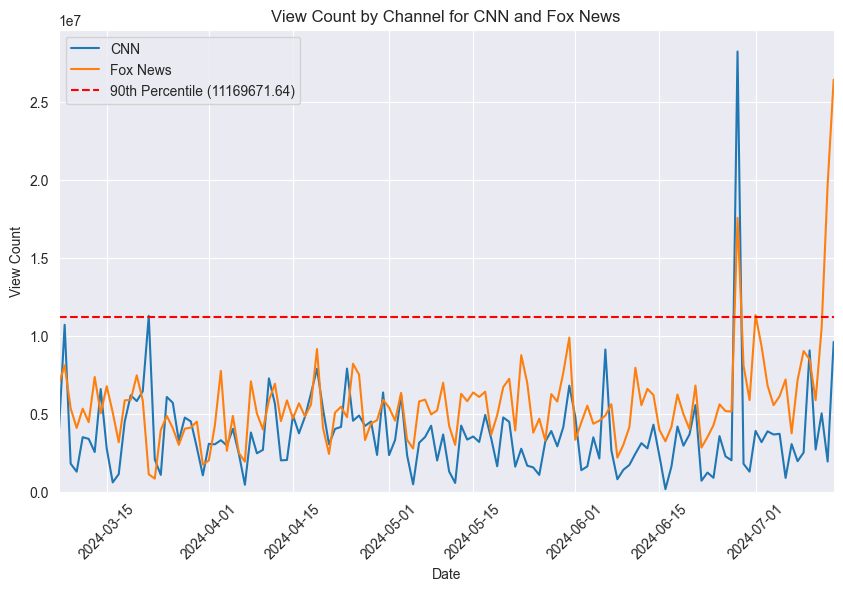

Dates exceeding the 98th percentile for CNN
channel_name       CNN  Fox News
Date                            
2024-03-22    11273073   1109405
2024-06-28    28226595  17562402
Dates exceeding the 98th percentile for Fox News
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
2024-07-01     3892768  11326367
2024-07-13     1927858  19701172
2024-07-14     9601638  26416683


<Figure size 1000x600 with 0 Axes>

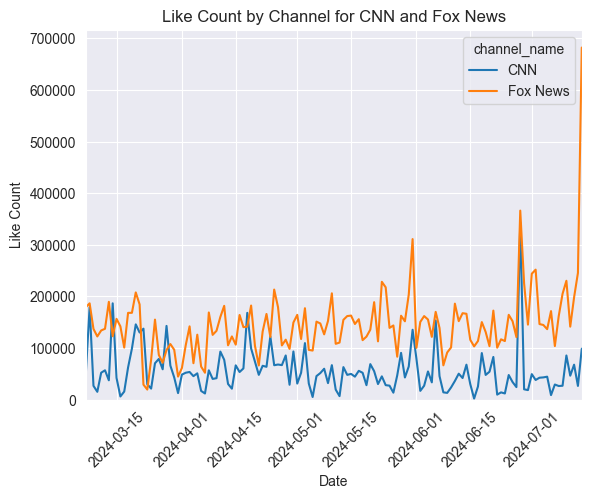

<Figure size 1000x600 with 0 Axes>

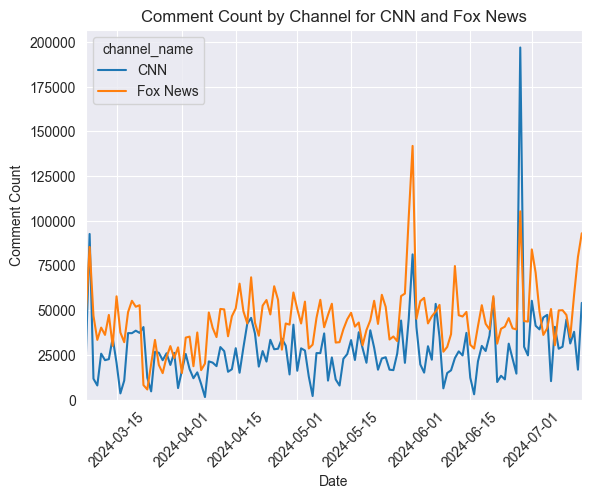

In [10]:
# Plot filled line chart with an upper quantile line
data = cnn_fox.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0)
# Calculate the 90th percentile for the view counts across all data.
quantile = data.values.flatten()
quantile = quantile[quantile > 0]  # Remove zeros if necessary
percentile = np.percentile(quantile, 98)
# Plot the data.
plt.figure(figsize=(10, 6))
data.plot(ax=plt.gca())
plt.title('View Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('View Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
# Add the 90th percentile line.
plt.axhline(y=percentile, color='r', linestyle='--', label=f'90th Percentile ({percentile:.2f})')
plt.legend()
# Show the plot.
plt.show()
# print the dates exceeding the percentile line
print("Dates exceeding the 98th percentile for CNN")
print(data[data['CNN'] > percentile])
print("Dates exceeding the 98th percentile for Fox News")
print(data[data['Fox News'] > percentile])

plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Like Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# Plot filled line chart
plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Comment Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [11]:
# find the outliers
cnn_fox['view_count'].describe()
# find those from 75% to 100%
cnn_fox[cnn_fox['view_count'] > cnn_fox['view_count'].quantile(0.99)]

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,view_count_log,like_count_log,comment_count_log
379,CNN,Reporter describes moment judge told Trump to ...,2024-04-20T00:30:48Z,S2v9JeYwfjk,1862289,26191,8611,2024-04-20,14.437317,10.173171,9.060796
468,CNN,Hear Michael Douglas&#39; response when asked ...,2024-04-21T18:00:31Z,k2MN2eq4UjE,2209627,35893,9395,2024-04-21,14.608334,10.488298,9.147933
685,Fox News,Israel begins retaliatory strikes on Iran: Report,2024-04-19T02:13:51Z,xKVy4NgZF-w,1937049,23220,7335,2024-04-19,14.476676,10.052769,8.900413
701,CNN,"Israel has attacked Iran, US official tells CNN",2024-04-19T03:23:01Z,F22D0jCGdLU,1478757,13230,7982,2024-04-19,14.206712,9.490242,8.984944
1058,CNN,Watch US Marine’s GoPro footage that challenge...,2024-04-24T11:55:16Z,SkM-Eyw4o-w,2694253,40103,7261,2024-04-24,14.806632,10.599206,8.890273
1252,CNN,Professor who correctly predicted 9 presidenti...,2024-04-30T11:00:20Z,PB8JazHcQ_k,1872430,20273,8042,2024-04-30,14.442748,9.917045,8.992433
1452,CNN,Boston Dynamic retires their famous robot,2024-04-18T01:35:15Z,u9CFE5dR8mU,1618978,86727,2395,2024-04-18,14.297306,11.370521,7.781139
2068,CNN,How Melania reacted when she learned about Tru...,2024-04-17T01:19:21Z,CZuUFWiFwsc,1717818,15446,5432,2024-04-17,14.356565,9.645105,8.600063
2640,CNN,"Watch Colin Jost roast Biden, Trump and others...",2024-04-28T03:44:54Z,OzhqFrtcTU4,2129016,38764,5587,2024-04-28,14.571170,10.565247,8.628198
4641,CNN,Sean &#39;Diddy&#39; Combs seen on video assau...,2024-05-17T20:47:08Z,3Ti0hUQPy5U,2753095,24758,12369,2024-05-17,14.828236,10.116904,9.422949


In [12]:
# Initialize appearance column with default value
cnn_fox['appearance'] = -1

# Iterate over each row and update appearance column based on video title
for index, row in cnn_fox.iterrows():
    title_lower = row['video_title'].lower()
    if 'trump' in title_lower and 'biden' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 0
    elif 'biden' in title_lower and 'trump' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 1
    elif 'biden' in title_lower and 'trump' in title_lower:
        cnn_fox.at[index, 'appearance'] = 2

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/3238663859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_fox['appearance'] = -1


In [13]:
cnn_fox_political = cnn_fox[cnn_fox['appearance'] != -1]
cnn_fox_political.describe()
var = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)]

In [14]:
# fnd the 5 dates with the most views and show the videos on those dates
top_dates = cnn_fox_political.groupby('Date')['view_count'].sum().nlargest(5).index
print(top_dates)
cnn_fox_political[cnn_fox_political['Date'].isin(top_dates)][['Date', 'video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

Index([2024-06-28, 2024-07-14, 2024-07-13, 2024-03-08, 2024-05-31], dtype='object', name='Date')


,Date,video_title,view_count,like_count,comment_count,channel_name,appearance
7212,2024-03-08,&#39;The Five&#39; reacts to Biden&#39;s State...,529413,13505,5703,Fox News,1
7213,2024-03-08,Biden mispronounces Laken Riley&#39;s name dur...,103778,1378,1616,Fox News,1
7216,2024-03-08,"Harris Faulkner: Biden gave no hope, compassio...",107151,2929,1834,Fox News,1
7217,2024-03-08,Biden angers &#39;Squad&#39; member: &#39;No h...,731187,11796,6366,Fox News,1
7220,2024-03-08,‘DIFFICULT TO SIT THROUGH’: Mike Johnson slams...,766460,18507,6648,Fox News,1
...,...,...,...,...,...,...,...
18473,2024-07-14,Biden speaks out about the shooting at Trump r...,315600,3553,3931,CNN,2
18474,2024-07-14,Video captures shooting at Trump rally,2856015,18108,11920,CNN,0
18475,2024-07-14,Biden responds to Trump rally shooting,180610,8147,2038,CNN,2
18476,2024-07-14,Witness describes moment shooting occurred at ...,420846,4500,4443,CNN,0


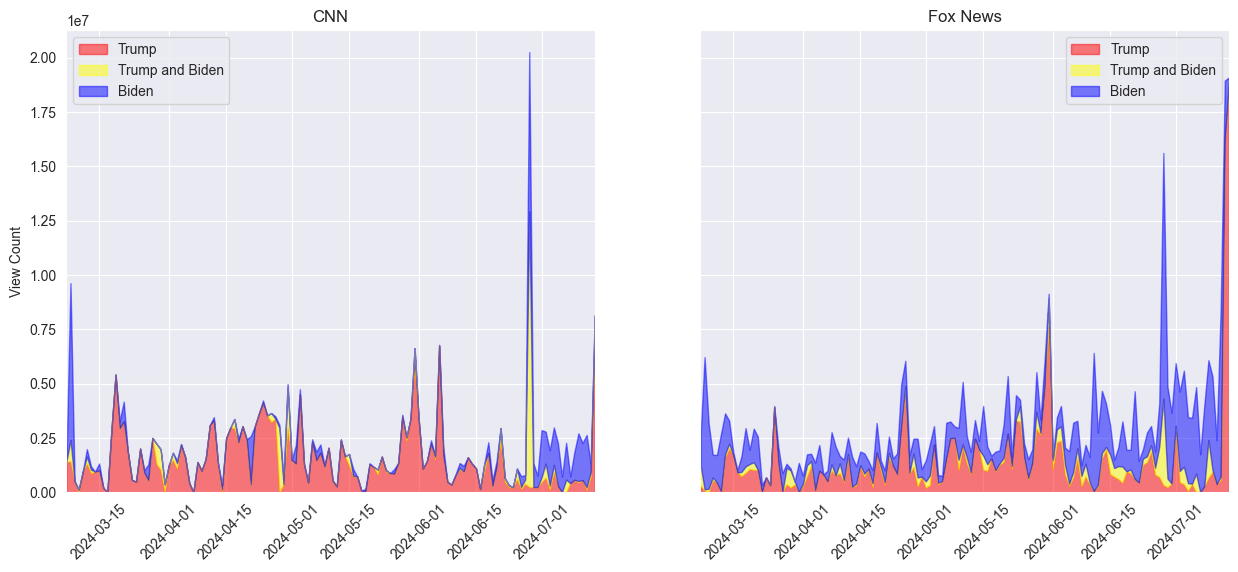

In [15]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('View Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

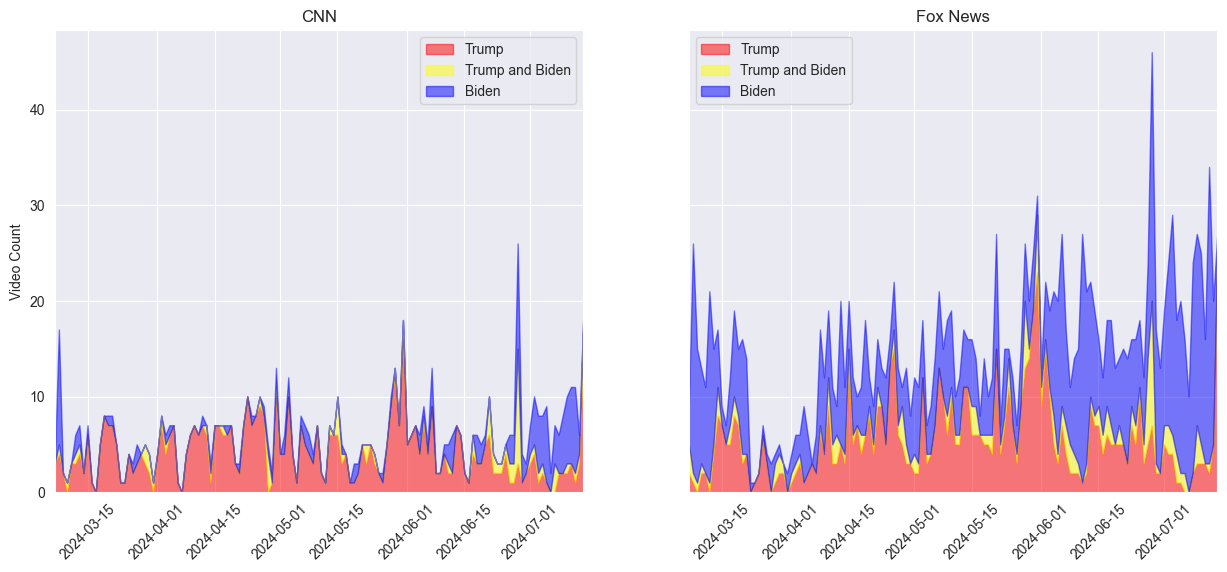

In [16]:
# raw video count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
    
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Video Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
    
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

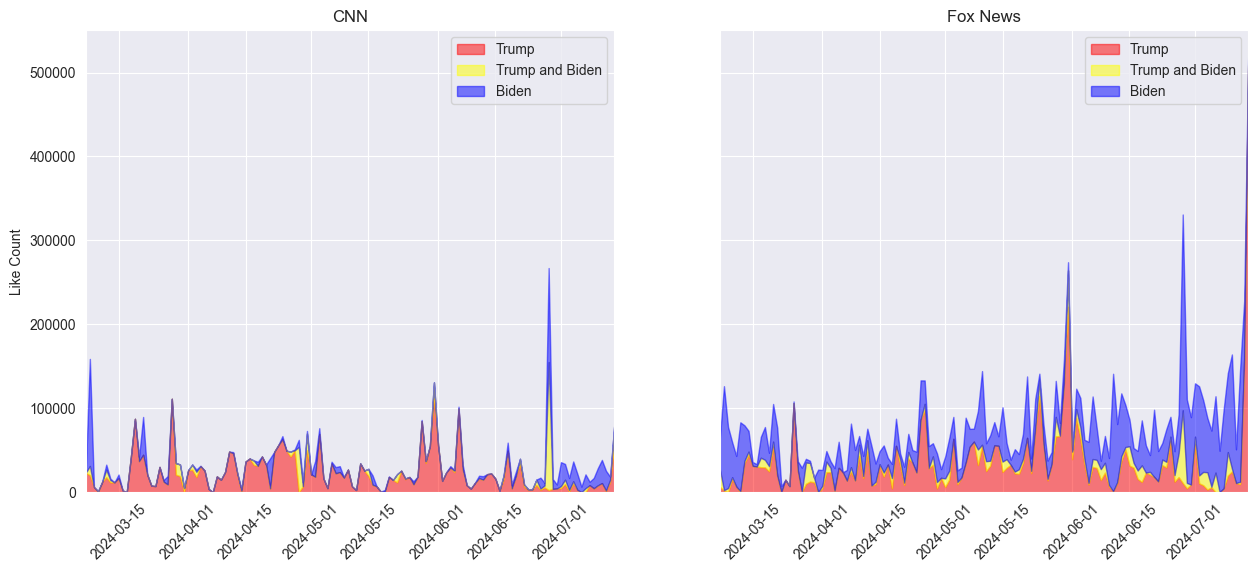

In [17]:
# like count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

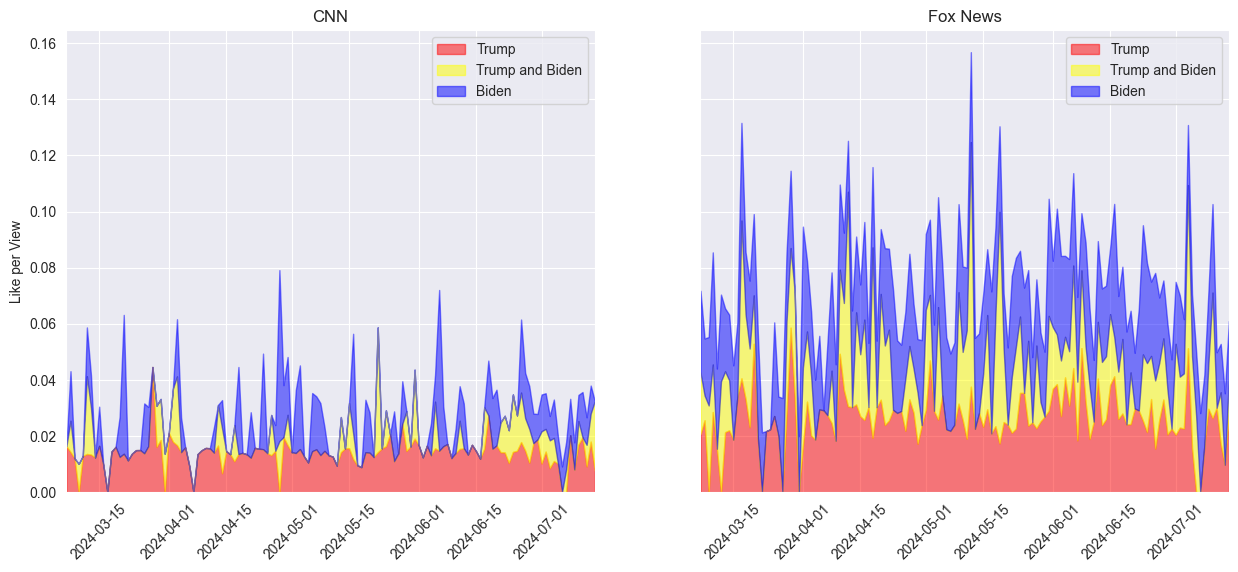

In [18]:
# like per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

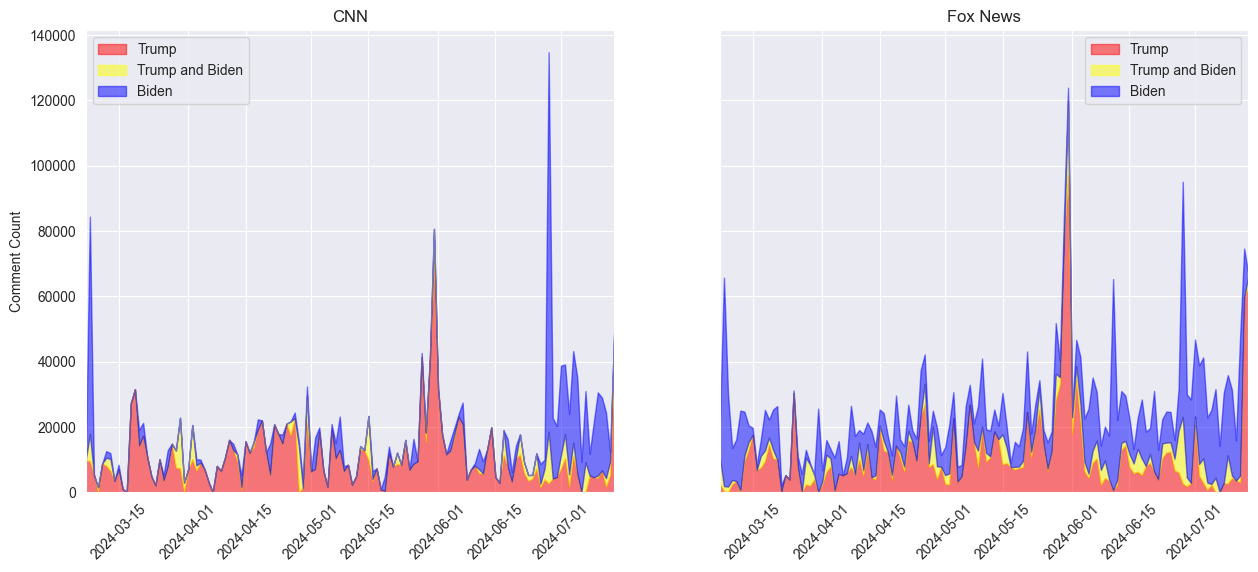

In [19]:
# comment count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

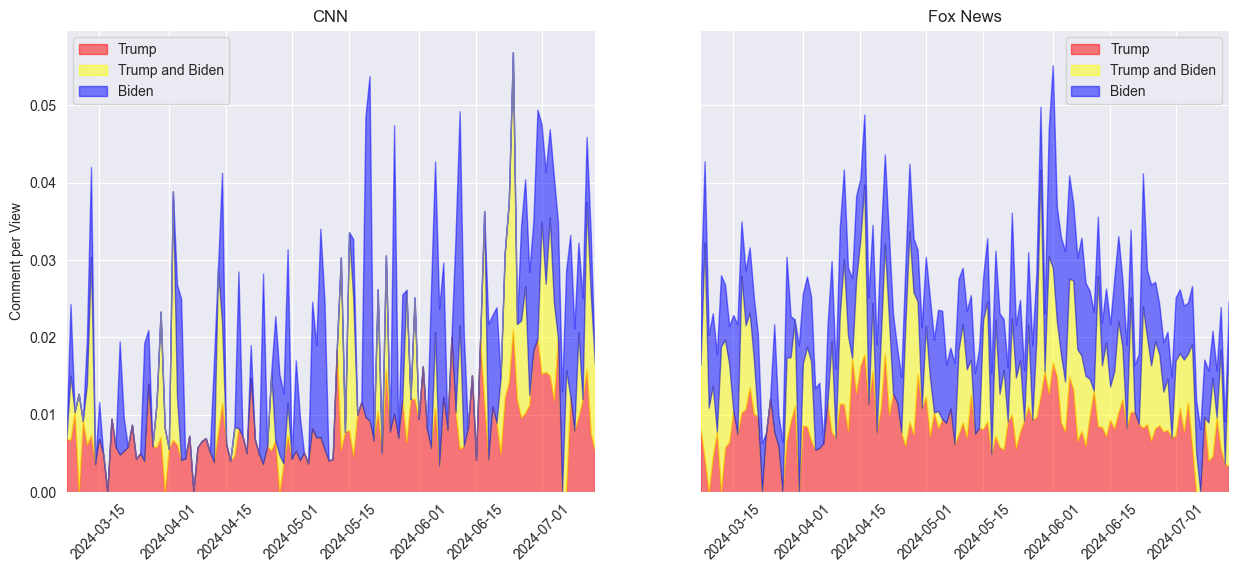

In [20]:
# comment per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [21]:
# most commented videos
most_commented = cnn_fox.nlargest(10, 'comment_count')
most_commented[['video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

,video_title,view_count,like_count,comment_count,channel_name,appearance
16931,See Biden&#39;s fiery speech after shaky debat...,2433178,56731,50293,CNN,1
18278,Shots fired at Trump rally,12103591,110061,37195,Fox News,0
7273,See Biden&#39;s response to Marjorie Taylor Gr...,3674983,63967,34961,CNN,1
16948,The must-watch moments of the CNN Presidential...,5000976,44717,30382,CNN,-1
11503,Robert De Niro spars with bystander during rem...,1549792,61282,27508,CNN,0
8461,Biden decried for proclaiming Transgender Visi...,1181770,18427,24824,Fox News,1
16101,Hear co-author of Ten Commandments bill’s resp...,587546,13728,22518,CNN,-1
16954,&#39;That was painful&#39;: Van Jones reacts t...,1789928,15284,22265,CNN,1
12050,&#39;You&#39;re lying&#39;: George Conway clas...,2130394,45331,20696,CNN,0
12753,Tom Hanks asked if he is worried about another...,6242632,86266,19560,CNN,0


Statistic Analysis

In [22]:
# statistical by date
cnn_fox.groupby('Date').describe()

view_count                                                   \
                count           mean           std      min        25%   
Date                                                                     
2024-03-07       37.0  282303.378378  3.198607e+05  13329.0   56923.00   
2024-03-08       68.0  276471.058824  4.874829e+05  15233.0   49848.75   
2024-03-09       40.0  178342.325000  1.631862e+05  12094.0   64425.00   
2024-03-10       38.0  141068.026316  1.369630e+05   8025.0   45152.00   
2024-03-11       36.0  244713.638889  2.223014e+05  15136.0   91129.25   
...               ...            ...           ...      ...        ...   
2024-07-10       61.0  287467.934426  6.791514e+05  12058.0   45669.00   
2024-07-11       50.0  171353.820000  1.559966e+05   2652.0   54033.25   
2024-07-12       67.0  231825.059701  3.826863e+05   5833.0   48751.50   
2024-07-13       37.0  584568.378378  1.986103e+06  17837.0   62516.00   
2024-07-14       64.0  562786.265625  6.293413e+05  30376.0  127644.75   

                                            like_count                ...  \
                 50%        75%         max      count          mean  ...   
Date                                                                  ...   
2024-03-07  155108.0  418689.00   1445220.0       37.0   6167.621622  ...   
2024-03-08  120102.5  316744.00   3674983.0       68.0   5381.764706  ...   
2024-03-09  119879.0  250459.00    681005.0       40.0   4096.375000  ...   
2024-03-10   74822.0  205687.00    548959.0       38.0   3620.289474  ...   
2024-03-11  167376.0  312368.75    943510.0       36.0   5169.111111  ...   
...              ...        ...         ...        ...           ...  ...   
2024-07-10  153548.0  336520.00   5272061.0       61.0   5178.163934  ...   
2024-07-11  106327.5  286887.25    615006.0       50.0   3756.740000  ...   
2024-07-12  106230.0  238689.00   2194170.0       67.0   3969.701493  ...   
2024-07-13  111175.0  361232.00  12103591.0       37.0   7357.135135  ...   
2024-07-14  309293.5  858206.75   2856015.0       64.0  12204.765625  ...   

           comment_count_log            appearance                           \
                         75%        max      count      mean       std  min   
Date                                                                          
2024-03-07          7.901748   8.689128       37.0 -0.405405  0.984871 -1.0   
2024-03-08          7.984061  10.461988       68.0  0.220588  0.990184 -1.0   
2024-03-09          7.755898   8.237215       40.0 -0.175000  1.009887 -1.0   
2024-03-10          7.276867   8.051978       38.0 -0.263158  1.031509 -1.0   
2024-03-11          7.618238   9.082734       36.0 -0.361111  0.866941 -1.0   
...                      ...        ...        ...       ...       ...  ...   
2024-07-10          7.658228   8.921458       61.0  0.114754  1.034382 -1.0   
2024-07-11          7.407254   8.977651       50.0 -0.040000  0.946745 -1.0   
2024-07-12          7.513979   9.317669       67.0  0.328358  0.975271 -1.0   
2024-07-13          7.380256  10.523930       37.0  0.216216  0.916974 -1.0   
2024-07-14          8.090761   9.385973       64.0 -0.109375  0.799150 -1.0   

                                 
            25%  50%   75%  max  
Date                             
2024-03-07 -1.0 -1.0  0.00  2.0  
2024-03-08 -1.0  1.0  1.00  2.0  
2024-03-09 -1.0 -1.0  1.00  2.0  
2024-03-10 -1.0 -1.0  1.00  2.0  
2024-03-11 -1.0 -1.0  0.25  1.0  
...         ...  ...   ...  ...  
2024-07-10 -1.0  0.0  1.00  2.0  
2024-07-11 -1.0  0.0  1.00  1.0  
2024-07-12 -1.0  1.0  1.00  2.0  
2024-07-13 -1.0  0.0  1.00  2.0  
2024-07-14 -1.0  0.0  0.00  2.0  

[130 rows x 56 columns]

# set feature as the video title and channel name, target as the engagement(comment rate)
# calculate the comment rate
df['comment_rate'] = df['comment_count'] / df['view_count']
df['comment_rate'].describe()

# find the outliers
df['comment_rate'].quantile(0.99)
df[df['comment_rate'] > df['comment_rate'].quantile(0.99)]

# vectorize the video title
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the vectorizer
X = vectorizer.fit_transform(df['video_title'])

# Convert the result to a DataFrame
title_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
title_df

# merge the title_df with the original dataframe
df = pd.concat([df, title_df], axis=1)
df

# split the data into training and testing
from sklearn.model_selection import train_test_split

# Define the features and target
features = title_df.columns
target = 'comment_rate'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# train the model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# predict the comment rate
y_pred = model.predict(X_test)
y_pred

# evaluate the model
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Accuracy
print(f"Mean Squared Error: {mse}")

# Calculate the coefficient of determination (r^2)
r2 = model.score(X_test, y_test)
print(f"R^2: {r2}")

# find the most important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
importances = importances[indices]
features = features[indices]

# Print the feature ranking
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. feature {features[f]} ({importances[f]})")